In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
occupation
Prof-specialty       6

/tmp/ipython-input-2-2991949914.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)
/tmp/ipython-input-2-2991949914.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

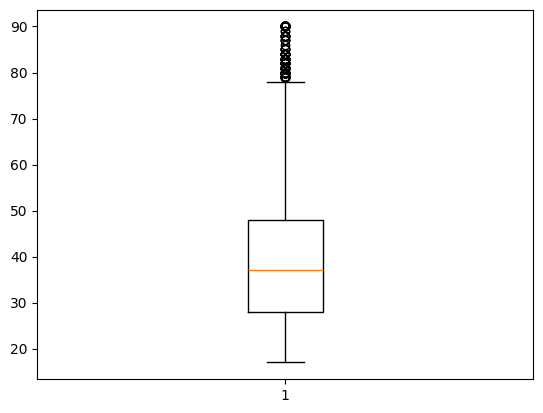

(48438, 15)


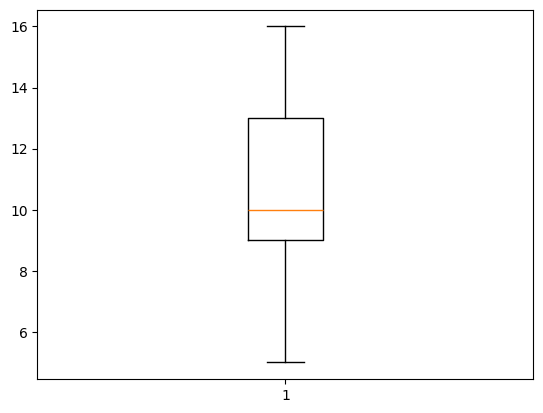

       age     workclass  fnlwgt  educational-num      marital-status  \
0       25       Private  226802                7       Never-married   
1       38       Private   89814                9  Married-civ-spouse   
2       28     Local-gov  336951               12  Married-civ-spouse   
3       44       Private  160323               10  Married-civ-spouse   
4       18        Others  103497               10       Never-married   
...    ...           ...     ...              ...                 ...   
48837   27       Private  257302               12  Married-civ-spouse   
48838   40       Private  154374                9  Married-civ-spouse   
48839   58       Private  151910                9             Widowed   
48840   22       Private  201490                9       Never-married   
48841   52  Self-emp-inc  287927                9  Married-civ-spouse   

              occupation relationship   race  gender  capital-gain  \
0      Machine-op-inspct    Own-child  Black    Male 

In [2]:
data=pd.read_csv(r"adult 3.csv")
data.head()

# Data Preprocessing and Visualization

data.isna().sum() #mean median mode arbitrary
print(data.workclass.value_counts())

data.workclass.replace({'?':'Others'},inplace=True)
print(data['workclass'].value_counts())
print(data['occupation'].value_counts())

data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())
print(data.relationship.value_counts())
print(data.gender.value_counts())

data.shape

#outlier detection
plt.boxplot(data['age'])
plt.show()

data=data[(data['age']<=75)&(data['age']>=17)]
print(data.shape)
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

plt.boxplot(data['educational-num'])
plt.show()
data=data.drop(columns=['education']) #redundant features removal
print(data)

encoder=LabelEncoder()                       #create object
data['workclass']=encoder.fit_transform(data['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data['marital-status']=encoder.fit_transform(data['marital-status'])   #3 categories 0, 1, 2
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])      #5 categories  0, 1, 2, 3, 4
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])    #2 catogories     0, 1
data['native-country']=encoder.fit_transform(data['native-country'])
print(data)

x=data.drop(columns=['income'])
y=data['income']
print(x)

In [3]:
# Training the Models
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.8179
              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.89      7068
        >50K       0.69      0.46      0.55      2276

    accuracy                           0.82      9344
   macro avg       0.77      0.70      0.72      9344
weighted avg       0.81      0.82      0.80      9344

RandomForest Accuracy: 0.8549
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7068
        >50K       0.74      0.62      0.68      2276

    accuracy                           0.85      9344
   macro avg       0.81      0.78      0.79      9344
weighted avg       0.85      0.85      0.85      9344

KNN Accuracy: 0.8273
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89      7068
        >50K       0.66      0.60      0.63      2276

    accuracy                           0.83      9344
   macro avg       0.77      0.75      0.

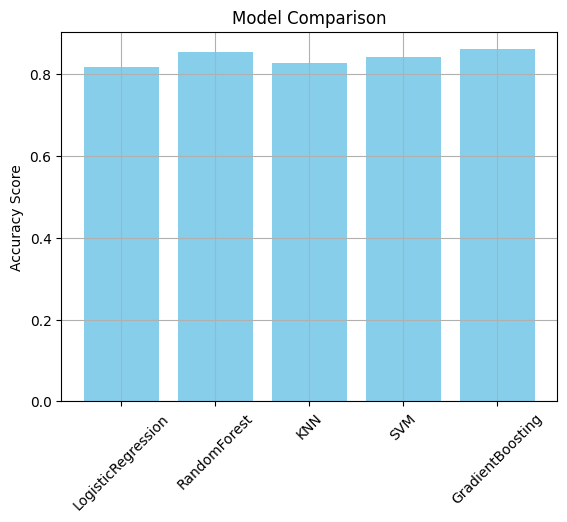

In [4]:
# Visualizing
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [5]:
# Comparing with Other Models
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.7981
RandomForest: 0.8502
KNN: 0.7733
SVM: 0.7924
GradientBoosting: 0.8603

✅ Best model: GradientBoosting with accuracy 0.8603
✅ Saved best model as best_model.pkl
